In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("electronic_devices_sales.csv")
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [11]:
preferred_method_payment = df.groupby('Customer ID')['Payment Method'].agg(lambda x: x.mode()[0])
preferred_method_payment

Customer ID
1000       Credit Card
1002              Cash
1003              Cash
1004       Credit Card
1005        Debit Card
             ...      
19994    Bank Transfer
19995      Credit Card
19996    Bank Transfer
19997    Bank Transfer
19998    Bank Transfer
Name: Payment Method, Length: 12136, dtype: object

In [16]:
total_spent = df.groupby('Customer ID')['Total Price'].sum()
total_spent

Customer ID
1000      6279.42
1002      5020.60
1003        41.50
1004        83.00
1005     11779.11
           ...   
19994     5504.87
19995     5394.56
19996    27296.78
19997     2528.26
19998      674.32
Name: Total Price, Length: 12136, dtype: float64

In [13]:
additional_spent = df.groupby('Customer ID')['Add-on Total'].sum()
additional_spent

Customer ID
1000      66.30
1002      60.16
1003      35.56
1004      65.78
1005      75.33
          ...  
19994     93.17
19995      0.00
19996    432.12
19997    101.34
19998      0.00
Name: Add-on Total, Length: 12136, dtype: float64

In [17]:
customer_summary = pd.DataFrame({
    'PreferredPaymentMethod': preferred_method_payment,
    'TotalSpent': total_spent,
    'TotalAdditionalSpent': additional_spent
})
customer_summary

,PreferredPaymentMethod,TotalSpent,TotalAdditionalSpent
Customer ID,,,
1000,Credit Card,6279.42,66.30
1002,Cash,5020.60,60.16
1003,Cash,41.50,35.56
1004,Credit Card,83.00,65.78
1005,Debit Card,11779.11,75.33
...,...,...,...
19994,Bank Transfer,5504.87,93.17
19995,Credit Card,5394.56,0.00
19996,Bank Transfer,27296.78,432.12


In [23]:
revenue_by_delivery = df.groupby('Shipping Type')['Total Price'].sum()
revenue_by_delivery

Shipping Type
Expedited    12437526.21
Express       8685215.62
Overnight     8704828.17
Same Day     12432024.82
Standard     21343073.55
Name: Total Price, dtype: float64

In [25]:
revenue_by_product_type = df.groupby('Product Type')['Total Price'].sum()
revenue_by_product_type

Product Type
Headphones     4041400.24
Laptop        12296239.97
Smartphone    21516754.69
Smartwatch    14036273.06
Tablet        11712000.41
Name: Total Price, dtype: float64

In [26]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.month
df['Quarter'] = df['Purchase Date'].dt.quarter
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Month,Quarter
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,3,1
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,4,2
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,10,4
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,8,3
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00,6,2
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00,7,3
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,8,3
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34,1,1


In [28]:
monthly_service_revenue = df.groupby('Month')['Add-on Total'].sum()
monthly_service_revenue

Month
1     136195.16
2     120148.92
3     124954.26
4     123973.59
5     132018.51
6     126689.59
7     132017.20
8     135133.14
9     107531.51
10     37837.12
11     34888.81
12     33509.15
Name: Add-on Total, dtype: float64

In [29]:
quarterly_service_revenue = df.groupby('Quarter')['Add-on Total'].sum()
quarterly_service_revenue

Quarter
1    381298.34
2    382681.69
3    374681.85
4    106235.08
Name: Add-on Total, dtype: float64

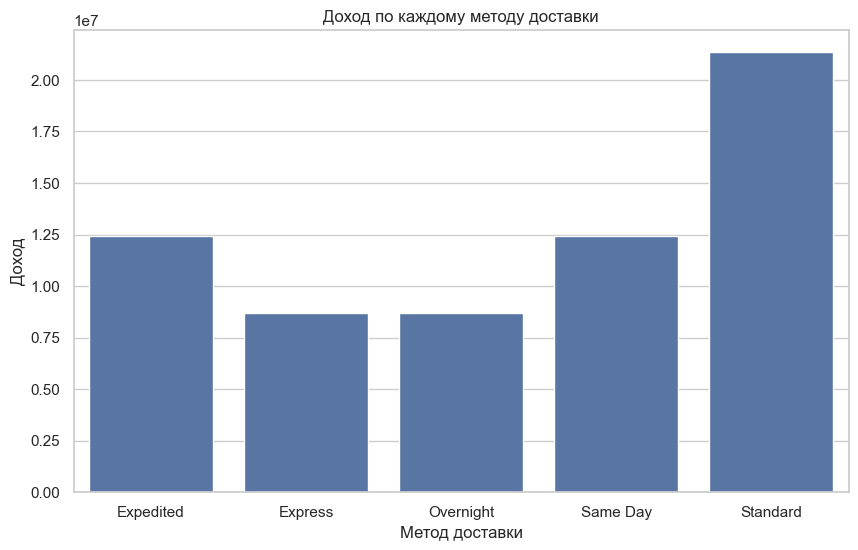

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_delivery.index, y=revenue_by_delivery.values)
plt.title("Доход по каждому методу доставки")
plt.xlabel("Метод доставки")
plt.ylabel("Доход")
plt.show()

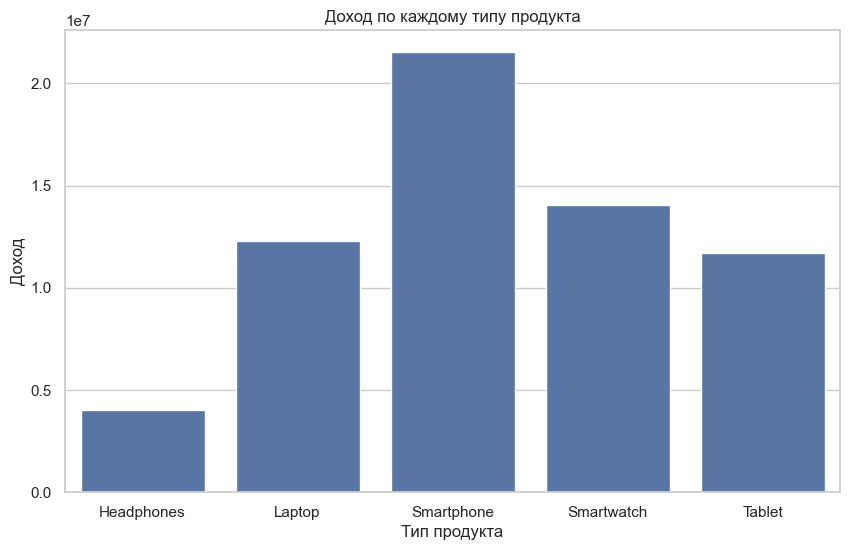

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_product_type.index, y=revenue_by_product_type.values)
plt.title("Доход по каждому типу продукта")
plt.xlabel("Тип продукта")
plt.ylabel("Доход")
plt.show()

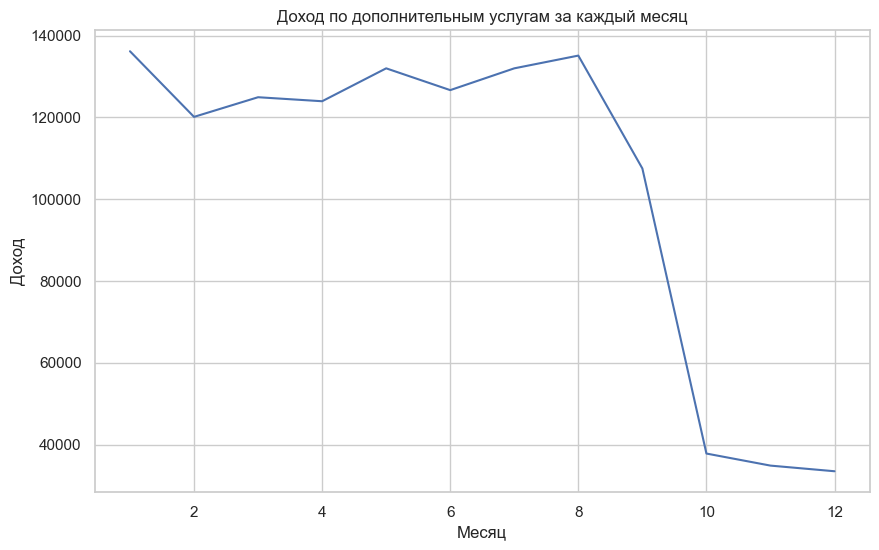

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_service_revenue.index, y=monthly_service_revenue.values)
plt.title("Доход по дополнительным услугам за каждый месяц")
plt.xlabel("Месяц")
plt.ylabel("Доход")
plt.show()

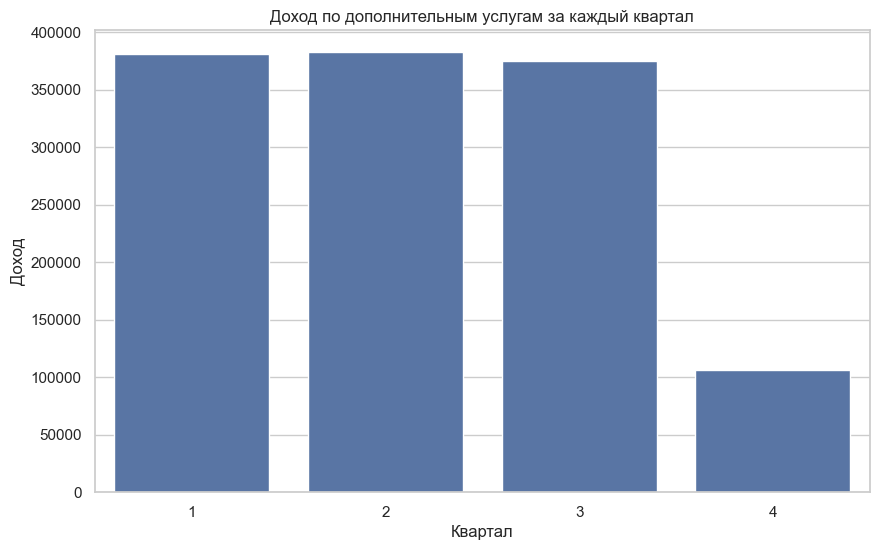

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=quarterly_service_revenue.index, y=quarterly_service_revenue.values)
plt.title("Доход по дополнительным услугам за каждый квартал")
plt.xlabel("Квартал")
plt.ylabel("Доход")
plt.show()